# Climate Smart fertilizer advisory for Maize In Nigeria

The purpose of this notebook to use the standard machine learning models that analyze various soil features like N, P, K, soil and environmental parameters such as temperature and rainfall indicess based on the bioclimate variable for nigeria to recommend the type of fertilizer to be used for the maize crops. Therefore,  this notebook  can analyze available datasets and to predict fertilizer requirements for maize crop over Nigeria based on soil features and environmental parameters to select appropriate machine learning models for operational purpose.



### Dataset 

The data used in this project is made by augmenting and combining various publicly available datasets like weather, soil, etc. You can access the dataset [here](https://github.com/jemsethio/Nigeria_fertilizer/data').

This data prepared from th legacy field trials data measuring yield response to nutrients from the 
[Carob](https://carob-data.org/download.html'). The data have Nitrogen, Phosphorous, Potassium, ph and other soil and covariat also included form ISRIC and world clim data.

**The description of the variables used in this dataset**.

**Feature variables**:
- **Temperature**: Temperature in °C
- **Rainfall**: Annual rainfall as in mm
- **pH**: Soil pH 
- **N**: Available Nitrogen at soil
- **P**: Available Phosphorus at soil
- **K**: Available Potassium at soil
- **Soil_type**: Silty clay, Sandy,  6. Clay loam ...
- **Crop**: maize
- **BIO1**: Annual Mean Temperature
- **BIO2**: Mean Diurnal Range (Mean of monthly (max temp - min temp))
- **BIO3**: Isothermality (BIO2/BIO7) (×100)
- **BIO4**: Temperature Seasonality (standard deviation ×100)
- **BIO5**: Max Temperature of Warmest Month
- **BIO6**: Min Temperature of Coldest Month
- **BIO7**: Temperature Annual Range (BIO5-BIO6)
- **BIO8**: Mean Temperature of Wettest Quarter
- **BIO9**: Mean Temperature of Driest Quarter
- **BIO10**: Mean Temperature of Warmest Quarter
- **BIO11**: Mean Temperature of Coldest Quarter
- **BIO12**: Annual Precipitation
- **BIO13**: Precipitation of Wettest Month
- **BIO14**: Precipitation of Driest Month
- **BIO15**: Precipitation Seasonality (Coefficient of Variation)- **
- **BIO16**: Precipitation of Wettest Quarter
- **BIO17**: Precipitation of Driest Quarter
- **BIO18**: Precipitation of Warmest Quarter
- **BIO19**: Precipitation of Coldest Quarter

## Aproach 

In this project we are dealing with a classification problem. Therefore we have fitted our dataset into few popular machine learning models such as K-Nearest Neighbors, Decision Tree, Random Forest and Gradient Boosting to predict fertilizer recommendation for rice and coconut. Finally, we will select one or two models based on their accuracy and precision.


**The present study deals with the following steps were followed to achieve the goal of this project.**. 

i) **Exploratory Data Analysis** 
- Reading the data as Pandas DataFrame
- Checking the data types and looking for missing values
- Checking the basic statistics of the variables
- Exploring the data using Barplots, Histogram, Boxplot, and Association heatmap.

ii) **Data preprocessing**
- Create feature set and target 
- Data transformation
- Spliting  dataset into train and test

iii) **Fitting dataset into model** 
- K-Nearest Neighbors
- Decision Tree
- Random Forest 
- Gradient Boosting

iv) **Performance evaluation**
- Accuracy score
- Recall
- Precision
- F1-score

### i) Exploratory data analysis
For better understanding dataset and their relationship we will use some statistical and visualization function.

In [11]:
# Importing libraries and packages for basic statistics
import os # To change working directory
import pandas as pd # to read and manipulating data 
import numpy as np # to calculate mean and standard deviations

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#### Reading the data as Pandas DataFrame

In [13]:
#Load dataset to start EDA
df = pd.read_csv('cov_train.csv')
display(df.head(10))

After reading the dataset, we use head() function to display the dataset and columns function for column name.

In [15]:
# To find Column name
df.columns

Index(['slope', 'bdod', 'cec', 'clay', 'nitrogen', 'ocd', 'phh2o', 'sand',
       'silt', 'soc', 'BIO1', 'BIO2', 'BIO3', 'BIO4', 'BIO5', 'BIO6', 'BIO7',
       'BIO8', 'BIO9', 'BIO10', 'BIO11', 'BIO12', 'BIO13', 'BIO14', 'BIO15',
       'BIO16', 'BIO17', 'BIO18', 'BIO19', 'TLID', 'Treatment', 'var',
       'SoilType', 'N', 'P', 'K', 'TY'],
      dtype='object')

#### Checking the data types and looking for missing values

In next step we gather some information about different rows and columns in Dataset. We used df.shape and df.info() which gives information about the number of rows, columns, column data types, memory usage, etc. Then isnull() function was used which find out whether there are missing values present or not.

In [17]:
# To find the number of rows and columns
print(df.shape)
# check for the data types, memory usage, etc
display(df.info())

(2651, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   slope      2651 non-null   float64
 1   bdod       2651 non-null   float64
 2   cec        2651 non-null   float64
 3   clay       2651 non-null   float64
 4   nitrogen   2651 non-null   float64
 5   ocd        2651 non-null   float64
 6   phh2o      2651 non-null   float64
 7   sand       2651 non-null   float64
 8   silt       2651 non-null   float64
 9   soc        2651 non-null   float64
 10  BIO1       2651 non-null   float64
 11  BIO2       2651 non-null   float64
 12  BIO3       2651 non-null   float64
 13  BIO4       2651 non-null   float64
 14  BIO5       2651 non-null   float64
 15  BIO6       2651 non-null   float64
 16  BIO7       2651 non-null   float64
 17  BIO8       2651 non-null   float64
 18  BIO9       2651 non-null   float64
 19  BIO10      2651 non-null   float64
 2

None

**Observations**: <br>
Number of rows = **2651** <br>
Number of columns = **37** (**34** feature variables and **3** target variable) <br>
Number of categorical(object) variables = **3**: Soil_type, variety, Treatment (target variable) <br>
Number of numerical variables = **7**: Temparature, Humidity, Rainfall, pH, N, P, K <br>

In [18]:
# checking the no. of missing values in the dataset
df.isnull().sum()

slope        0
bdod         0
cec          0
clay         0
nitrogen     0
ocd          0
phh2o        0
sand         0
silt         0
soc          0
BIO1         0
BIO2         0
BIO3         0
BIO4         0
BIO5         0
BIO6         0
BIO7         0
BIO8         0
BIO9         0
BIO10        0
BIO11        0
BIO12        0
BIO13        0
BIO14        0
BIO15        0
BIO16        0
BIO17        0
BIO18        0
BIO19        0
TLID         0
Treatment    0
var          0
SoilType     0
N            0
P            0
K            0
TY           0
dtype: int64

#### Checking the basic statistics of the variables

In [19]:
# statistics of the numerical variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
slope,2651.0,0.136955,0.101442,0.018307,0.080862,0.120599,0.152367,0.465601
bdod,2651.0,13.236853,0.462045,7.825850,13.093987,13.171618,13.400594,14.527959
cec,2651.0,7.910728,1.848351,5.434133,6.500000,7.560938,8.775251,15.038402
clay,2651.0,17.100099,3.603524,7.933997,14.307111,16.753464,18.789074,30.697699
nitrogen,2651.0,11.027313,3.803767,7.422076,8.969217,9.976305,12.011282,38.161282
ocd,2651.0,17.157883,3.164117,13.614899,15.055929,15.809133,17.867054,37.222450
phh2o,2651.0,6.102872,0.225299,5.074149,6.004103,6.132145,6.212676,6.561130
sand,2651.0,55.557125,6.385440,33.639572,52.348827,56.823204,59.182453,78.566147
silt,2651.0,27.335809,6.435203,11.927883,22.283199,27.194447,30.723846,39.224609
soc,2651.0,12.044949,4.613254,8.667665,9.566627,10.253915,13.678415,43.758190


  **NOTE**:
- It is observed that the mean and median values of the dataset are similar and thus a symmetrical distribution of the dataset is expected. 
- The dataset may contain extreme outliners. For futher confirmation we will visualize dataset with boxplot.

In [20]:
# statistics of the category variables
display(df.describe(include='object'))

,TLID,Treatment,var,SoilType
count,2651,2651,2651,2651
unique,427,15,4,4
top,TMS_F46,"N120,P22,K42",Hybrid,Sandy Loam
freq,20,1200,940,1971


#### Importing libraries  for data visualization

In [22]:
import matplotlib.pyplot as plt # to visualize graph
%matplotlib inline 
import seaborn as sns # for better visualization of graph with the help of Matplotlib
from dython import nominal # to find out correlation and visualize it

**Explore the Target variable: Fertilizer**

In [23]:
# print the unique class of the Fertilizer 
print("There are seven class in Fertilizer: ", df['Treatment'].unique())

There are seven class in Fertilizer:  ['N46,P0,K0' 'N68,P10,K19' 'N62,P14,K27' 'N67,P20,K0' 'control'
 'N100,P30,K60' 'N120,P22,K42' 'N120,P40,K80' 'N120,P60,K30'
 'N150,P66,K30' 'N100,P50,K80' 'N150,P50,K80' 'N100,P50,K30'
 'N120,P26,K49' 'N120,P26,K50']


<AxesSubplot: xlabel='count', ylabel='Treatment'>

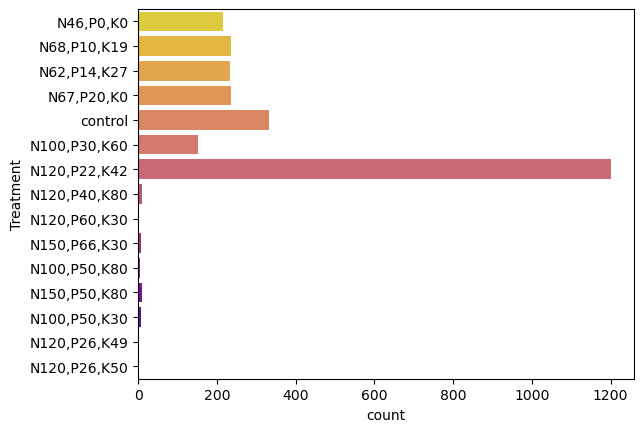

In [24]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Treatment',data=df,palette="plasma_r")

#### Explore the continuous and categorical feature variables

In [25]:
# Defining function for Continuous variable and their relationship with target variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['SoilType'])

#### Univariate Analysis 

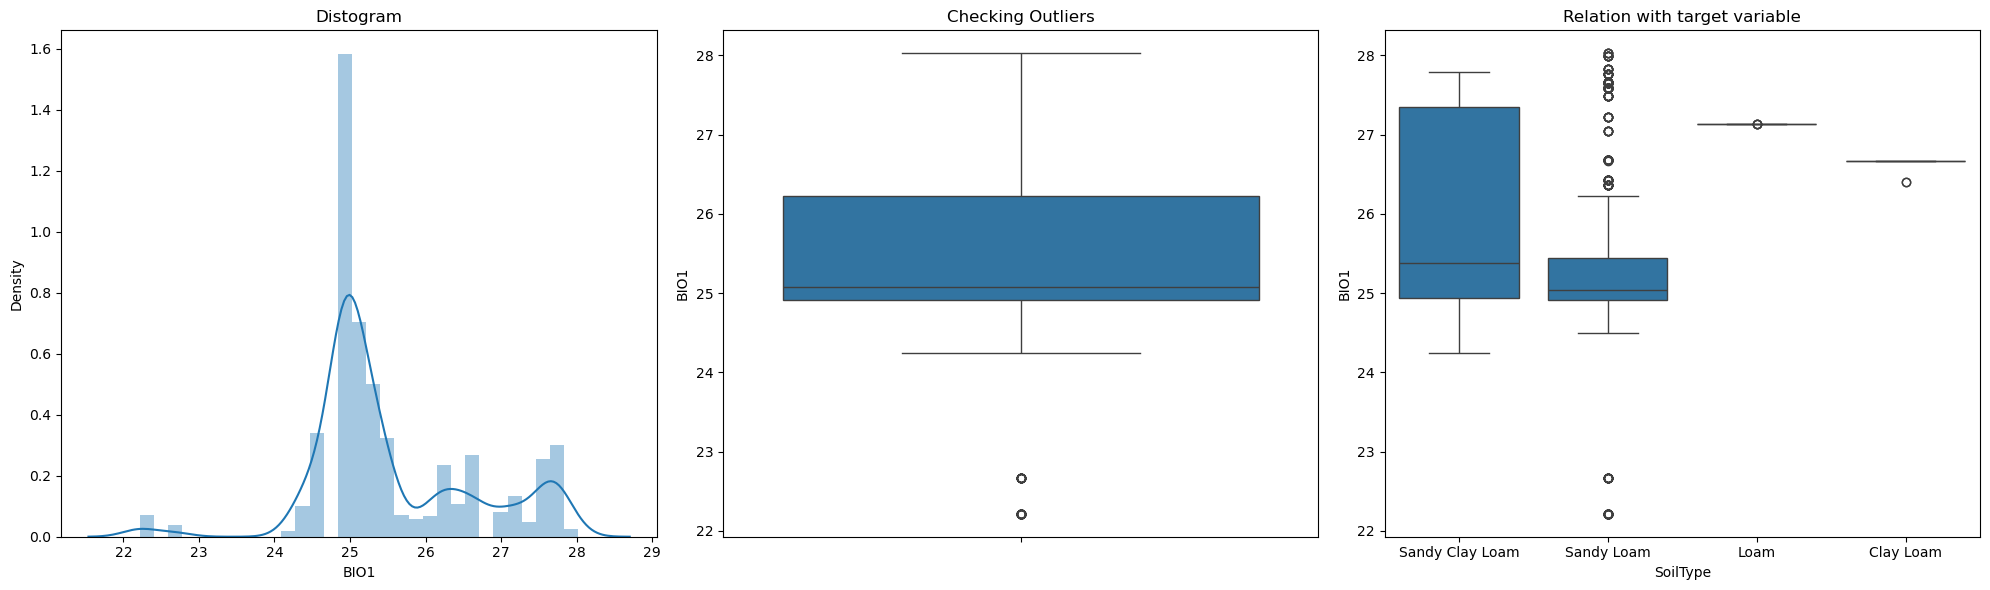

In [26]:
# EDA - Temparature variable
plot_conti(df['BIO1'])

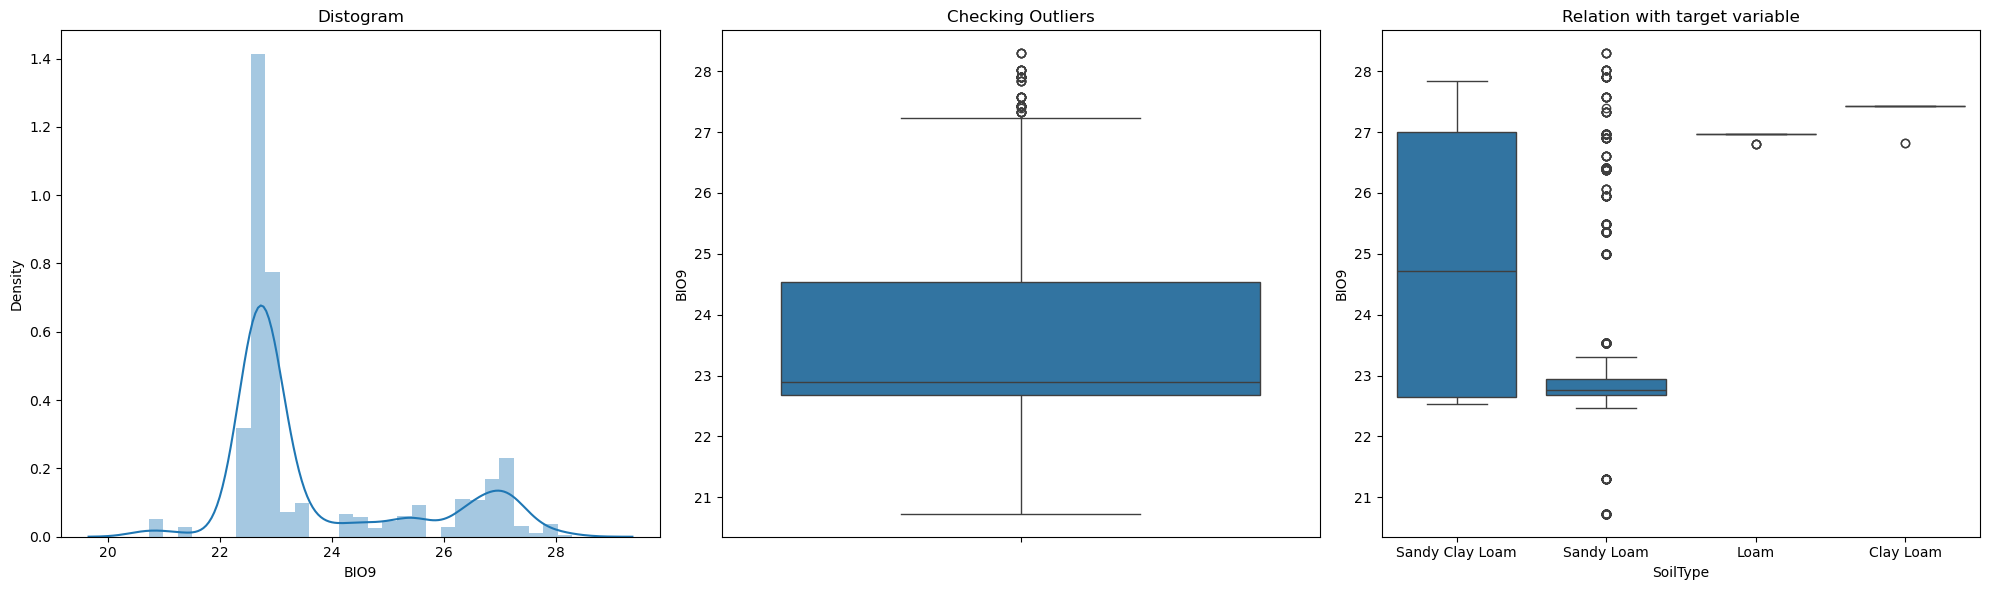

In [28]:
#EDA - Rainfall variable
plot_conti(df['BIO9'])

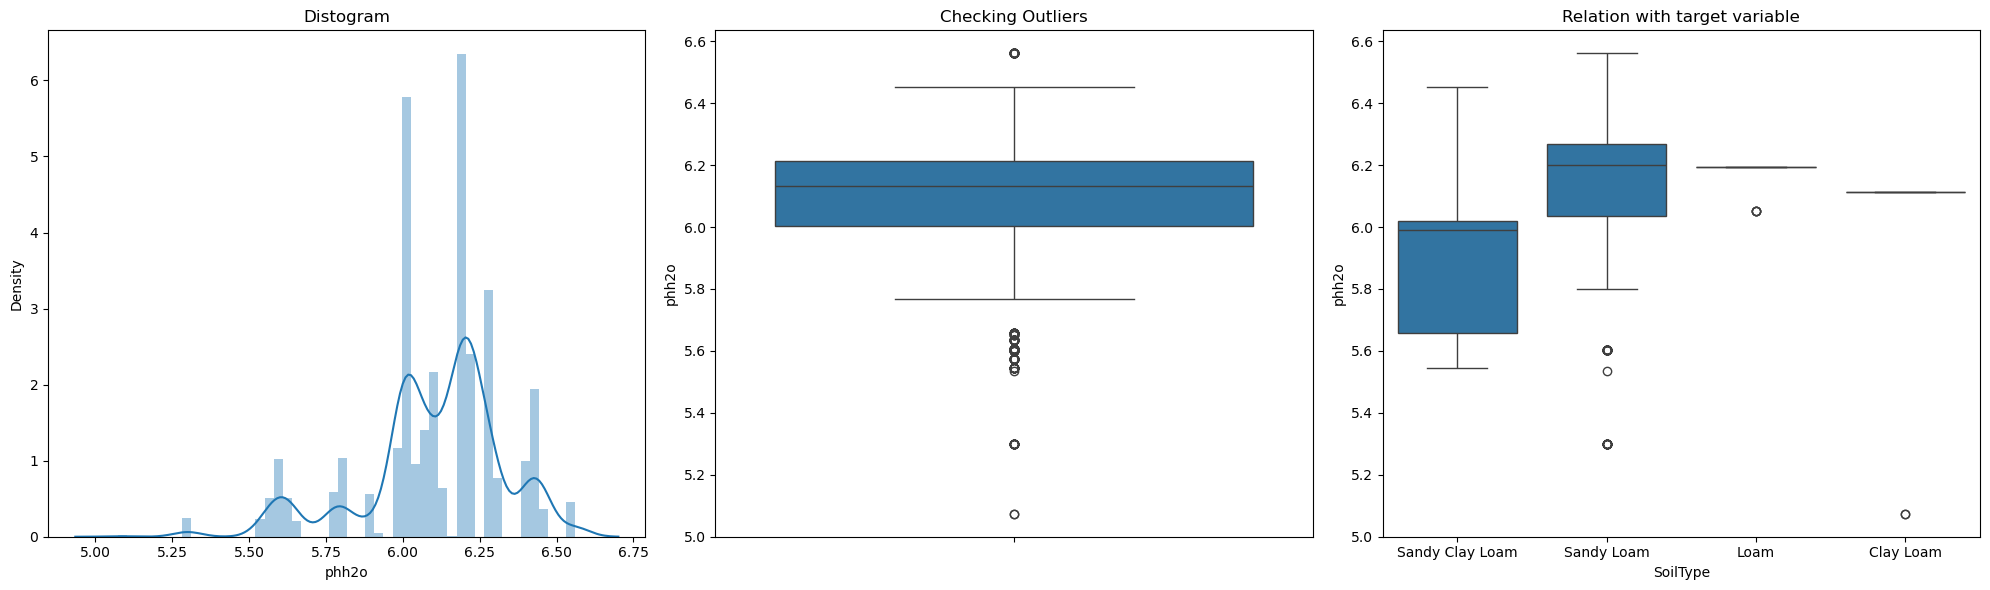

In [29]:
# EDA - pH variable
plot_conti(df['phh2o'])

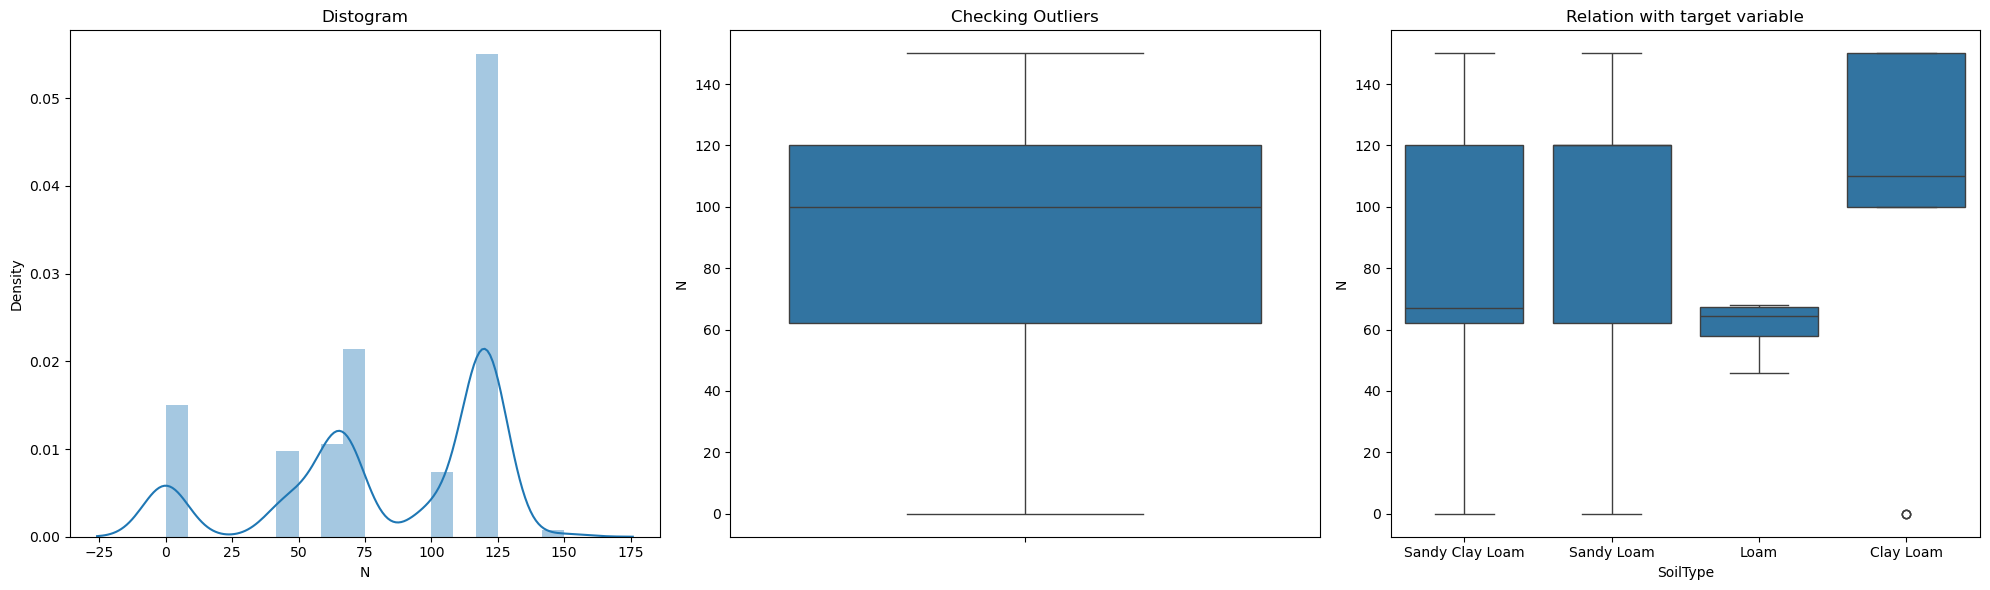

In [30]:
#EDA - Nitrogen variable
plot_conti(df['N'])

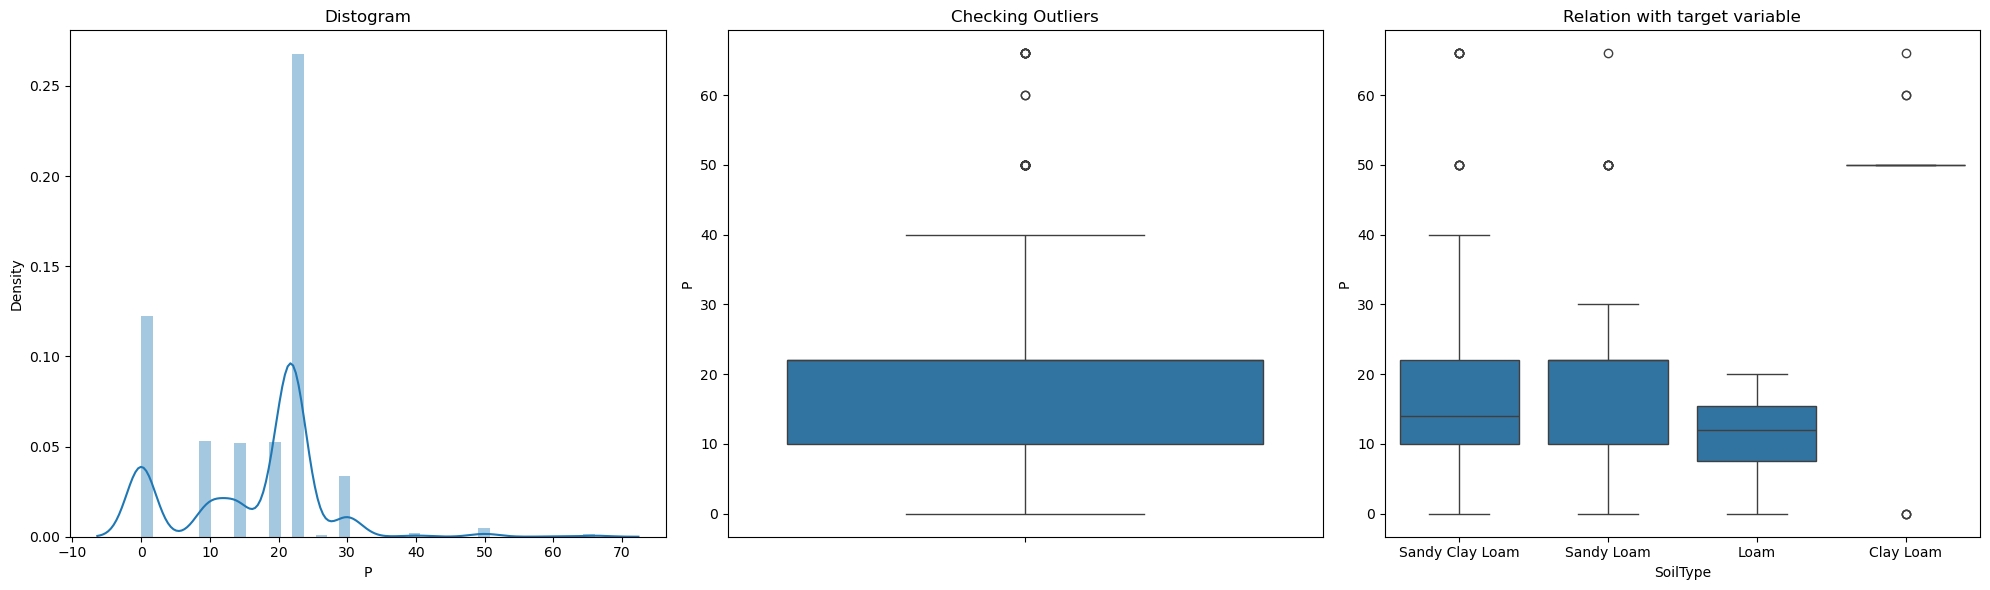

In [31]:
#EDA - Phosphorus variable
plot_conti(df['P'])

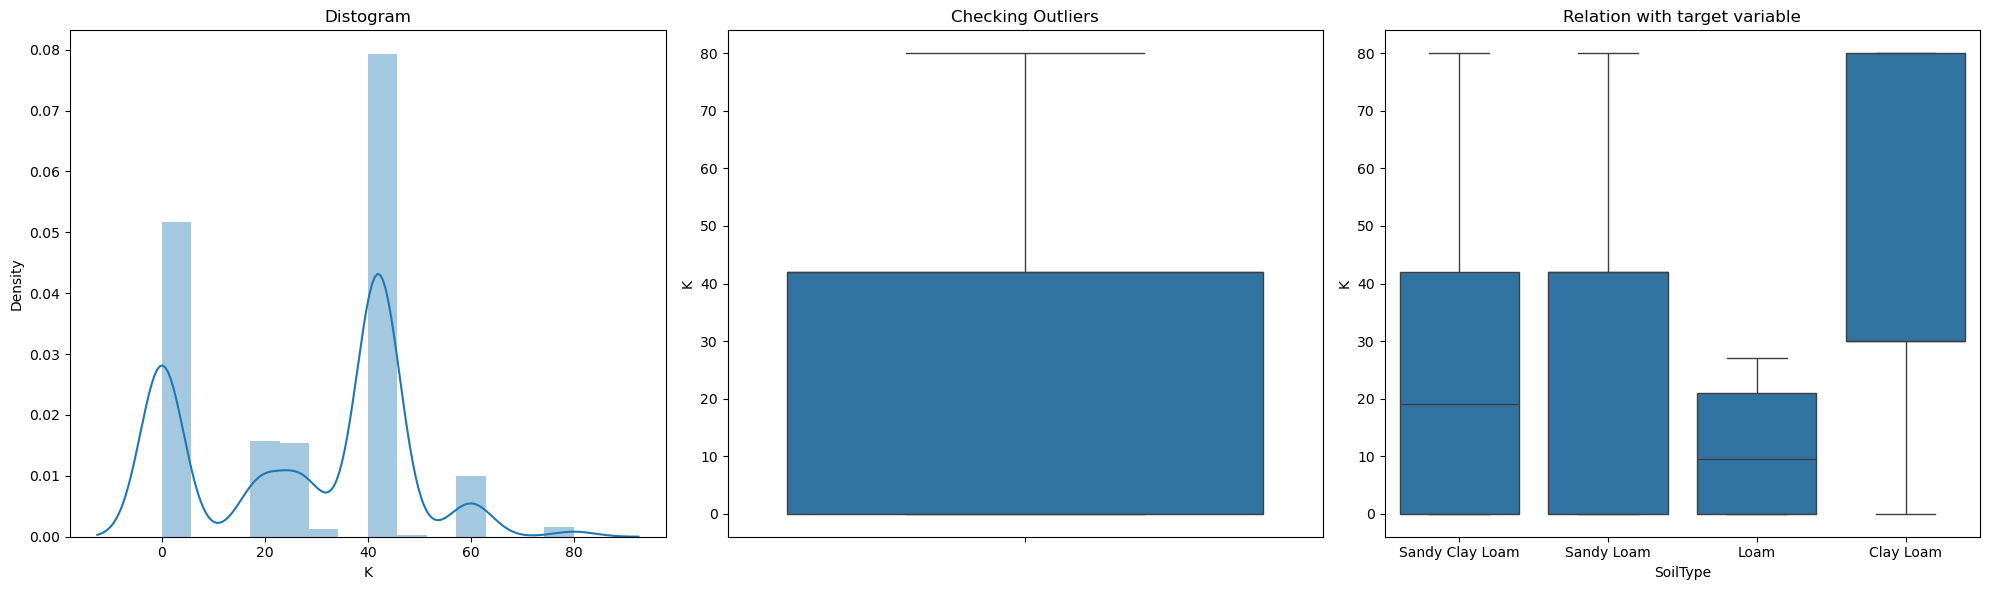

In [32]:
#EDA - Potassium variable
plot_conti(df['K'])

**Note:** 
From the above distoplot and boxplot, it's clear that the given features are either negetively or positively skewed. there are some outliners alsopresent. So, we need to perform data transformation before applying K-NN model but for ensemble model, it is not mandatory.

In [33]:
# Defining function to visualize catogorical variable and their relationship with target variable
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Treatment'], ax=axes[1])

In [34]:
# print the unique types of the Soil
print("Soil : ", df['SoilType'].unique())

Soil :  ['Sandy Clay Loam' 'Sandy Loam' 'Loam' 'Clay Loam']


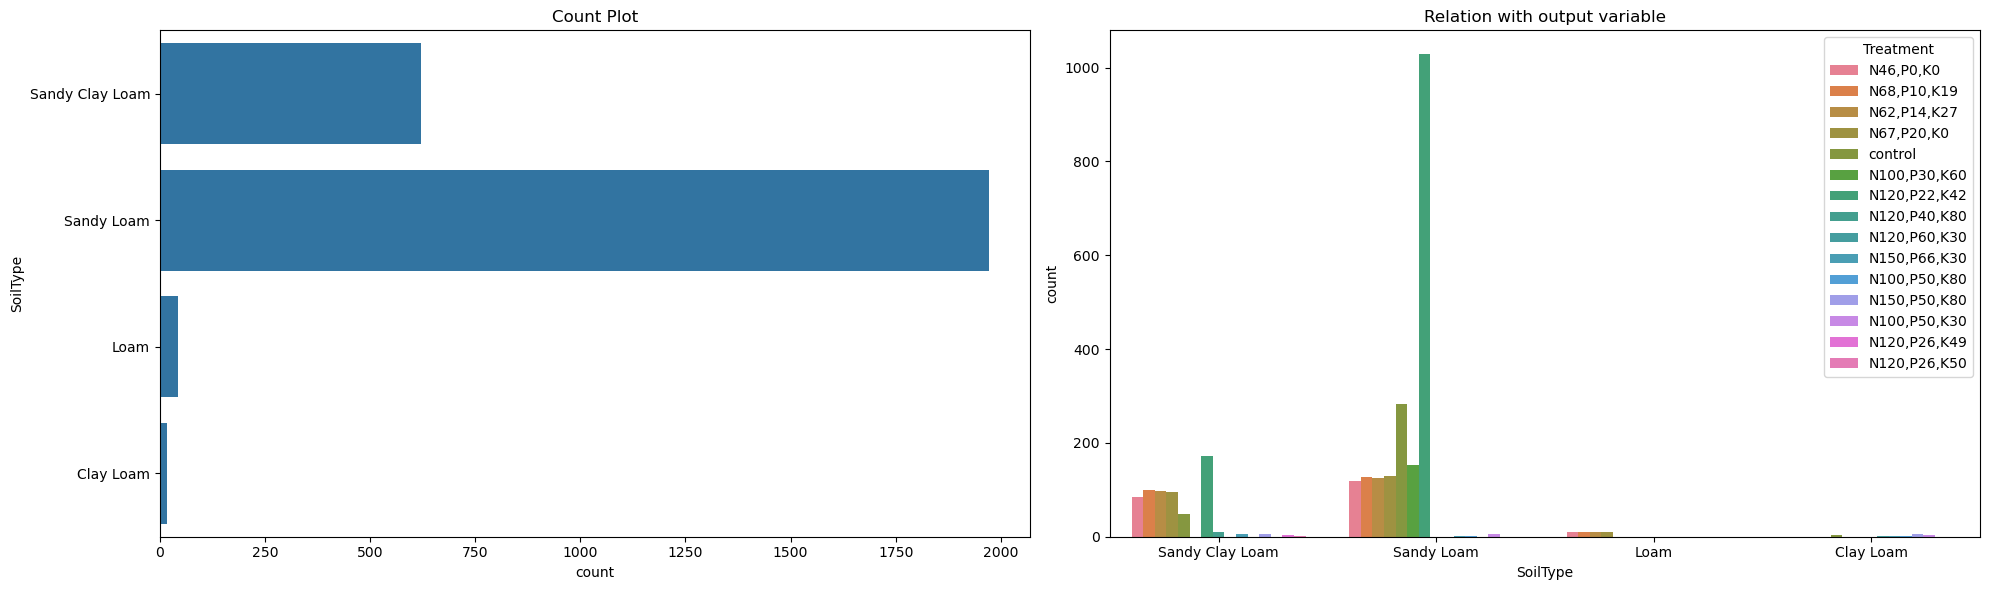

In [35]:
#EDA - Soil_variable
plot_cato(df['SoilType'])

#### Bi-Variate Analysis

In [46]:
#To find out correlation with both nominal and numeric variables
nominal.associations(df,figsize=(26,10),
                     mark_columns=True,
                     title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn')

### ii) Data Pre-processing

#### Importing libraries for data pre-processing

In [47]:
from sklearn.preprocessing import MinMaxScaler # to normalize data
from sklearn.preprocessing import LabelEncoder # to encode object variable to numeric
from sklearn.model_selection import train_test_split # to split data into training and testing sets

#### Create feature set and target 

In [48]:
X = df.drop(['Fertilizer'], axis=1) #feature variables
y = df[['Fertilizer']] #Target variable
print('The shape of feature set, X is ' , X.shape)
print('The shape of target, y is ' , y.shape)

#### Data transformation

In [49]:
display(df.head())

**NOTE**: Machine learning algorithms only understand the number not text, that's the reason we convert our categorical variable to numeric variable. LabelEncoder() function convert unique values of an object variables between 0 to n-1.

In [50]:
# normalize the feature(X) columns 
scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

**NOTE**: We have imported MinMax scaler from scikit-learn machine learning library to convert feature variables in between 0 to 1. Scaling the data for normalization is important for KNN as bringing all the features to the same scale is recommended for applying distance-based algorithms.

#### Spliting dataset into train and test

In [51]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)

**NOTE**: We have splitted the dataset 70% for training and 30% for test dataset. 

### iii) Fitting dataset into model

In [52]:
# Importing libraries for classification and performance evaluation
from sklearn.neighbors import KNeighborsClassifier #to build KNeighbors model
from sklearn.ensemble import GradientBoostingClassifier #to build GradientBoosting model
from sklearn.ensemble import RandomForestClassifier #to build RandomForest model
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import GridSearchCV # to best select hyperparameter

from sklearn.metrics import accuracy_score, classification_report # to calcutate accuracy of model
from sklearn.metrics import classification_report #to calculte precision, recall, f1-score
from sklearn.metrics import plot_confusion_matrix # to draw confusion_matrix

#### Classification model: K-Nearnest Neighbors

In [53]:
# To determine the k value with highest accuracy  
neighbors = np.arange(1,14)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**NOTE**: Firstly, we define a function to find out the accuracies with different values of k and it can be seen that with 3 nearest neighbors,,the highest testing accuracy is being shown. 
Now, create model for our dataset with K-Nearest Neighbors algorithm by passing argument number of neighbors(k=3) in KNeighborsClassifier() function.Then, fit our model on the train set using fit() and perform prediction on the test set using predict().

In [54]:
# Create K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_knn = model_knn.fit(X_train, y_train)

In [55]:
#Predict the response for test dataset
y_pred_knn = model_knn.predict(X_test)

In [56]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy of K-Nearest Neighbor Model: ', accuracy_score(y_test, y_pred_knn))

In [57]:
## To visualize confusion matrix
plot_confusion_matrix(model_knn, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [58]:
#Classification report
print(classification_report(y_test,y_pred_knn))

**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually. 

The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is 88%. From classification report we found that there were 89% pressision, 88% recall, and 88% f1-score.    

#### Classification model: DecisionTree 

In [59]:
#Decision Tree model
#random state (int): Controls the randomness of the estimator for reproducibility
model_DT = DecisionTreeClassifier(random_state=42)

# Train the model using the training sets
model_DT = model_DT.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_DT = model_DT.predict(X_test)

In [60]:
# To visualize confusion matrix
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [61]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))
#Classification report
print(classification_report(y_test, y_pred_DT))

**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually.

The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is about 97%. From classification report we found that there were 98% pressision, 97% recall, and 97% f1-score. 

In [62]:
# Visualizing Decision Tree 
plt.figure(figsize = (20, 20))
plot_tree(model_DT, 
        filled=True,
        rounded=True,
        class_names = ['Good NPK', 'Urea and MOP','Urea and DAP', 'DAP','Urea', 'DAP and MOP', 'MOP'],
        feature_names = X.columns,
        fontsize=12)

plt.show()

**NOTE:** Here we have constructed decision tree using defult depth where we have found leaf clade at the depth of 6.

#### Decision tree with grid search and cross validatin

In [63]:
# Hyperparameters
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

# GridSearchCV: to find the best hyperparameters based on the scoring method
#CV: Cross validation
grid_search_DT = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

In [64]:
# fit the model with the best hyper-parameters
grid_result_DT = grid_search_DT.fit(X_train, y_train)

#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [65]:
# Best hyperparameters in the grid search
grid_result_DT.best_params_

In [66]:
#Cross validation result
cv_result = pd.DataFrame(grid_result_DT.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

**NOTE:**Best hyperparameter ('criterion': 'entropy', 'max_depth': 4) with 5-fold cross validation result model's highest accuracy 97.8%.

In [67]:
#Prediction
y_pred_Grid = grid_result_DT.predict(X_test)

In [68]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_Grid))

#Classification report
print(classification_report(y_test, y_pred_Grid))

**NOTE**: 
The overall accuracy was not differred after executing hyperparameter tuning and cross validation. So, in this case grid serach would not be effective in DT model.  

#### Classification model: RandomForest

In [69]:
#Random Forest model
model_RF = RandomForestClassifier(random_state=42)

# Train the model using the training sets
model_RF = model_RF.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_RF = model_RF.predict(X_test)

In [70]:
# To visualize confusion matrix
plot_confusion_matrix(model_RF, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [71]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_RF))

#Classification report
print(classification_report(y_test, y_pred_RF))

**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually. 
The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is about 100%. From classification report we found that there were 100% pressision, 100% recall, and 100% f1-score.


Grid search was not performed as the overall accuracy was found as 100%.

#### Classification model: Gradient Boosting

In [ ]:
#Gradient Boosting model
model_GB = GradientBoostingClassifier()

# Train the model using the training sets
model_GB = model_GB.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred_GB = model_GB.predict(X_test)

In [ ]:
# To visualize confusion matrix
plot_confusion_matrix(model_GB, 
                      X_test, 
                      y_test, 
                      display_labels=['DAP and MOP','Good NPK','MOP','Urea and DAP','Urea and MOP','Urea','DAP'],
                      xticks_rotation ='vertical',
                      cmap='YlGnBu')
plt.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: ', accuracy_score(y_test, y_pred_GB))

#Classification report
print(classification_report(y_test, y_pred_GB))

**NOTE**: 
True and false positives, true and false negatives which are the the generic names of the predicted class can be calculated from confusion metrix manually. 
The classification report shows the classification metrix precision, recall and f1-score on a per-class basis. The overall accuracy is about 100%. From classification report we found that there were 100% pressision, 100% recall, and 100% f1-score.


Grid search was not performed as the overall accuracy was found as 100%.

## <center>Result

### iv) Performance evaluation of models 

In [ ]:
print("Model\t\t\tAccuracy of the model") 
print("""K-Nearest Neighbors\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_knn)))
print("""Decision Tree\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_DT)))
print("""Random Forest\t\t\t {:.4f}""".format(accuracy_score(y_test, y_pred_RF)))
print("""Gradient Boosting\t\t {:.4f}""".format( accuracy_score(y_test, y_pred_GB)))

**NOTE:** In brief, for our dataset the KNN model has the lowest accuracy of 88% while 100% accuracy was observed in RF and GB. 

#### Checking Prediction Performance


In [ ]:
df # Displaying dataset again

In [ ]:
#For K-Nearest Neighbours model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_knn.predict(data)
print(prediction)

In [ ]:
#For Decesion Tree model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = grid_result_DT.predict(data)
print(prediction)

In [ ]:
#For Random Forest model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_RF.predict(data)
print(prediction)

In [ ]:
##For Gradient Boosting model
data = np.array([[28.69, 96.65, 178.96, 6.08, 4.0, 4.0, 4.0, 4, 0]])
prediction = model_GB.predict(data)
print(prediction)

**NOTE:** Here we used a  sample feature data collected from second row of our dataset to check the prediction performance of the model tested. We found that Decision Tree, Random Forest, and Gradient Boosting have correctly predicted fertilizer class for second row except K-Nearest Neighbors model. 

## Conclusion 

Accuracy of Random Forest and Gradient Boosting are 100% whereas accuracy of K-Nearest Neighbors Classifier and Decision Tree are around 88.33% and 96.67%, respectively. One of the reason of 100% accuracy can be of small data set. So, either Random Forest or Gradient Boosting model can be selected to predict appropriate fertilizer more precisely. As a future work, the method can be extended including diverse varieties of crops with large amount of data.